In [1]:
import Utilities.prelude as prel
import numpy as np
import matplotlib.pyplot as plt

from Utilities.operators import make_tree

In [2]:
z_chosen = 0
mach_min = 1.3
gamma = 5/3
save = False
folder = 'sedov'
snap = '100'
path = f'{folder}/{snap}'

if folder == 'TDE':
    is_tde = True
    epsilon = 0.02
else:
    is_tde = False
    epsilon = 0.02

In [3]:
def soundspeed(gamma, pressure, density):
    cs = np.sqrt(gamma*pressure/density)
    return cs

def surface_area(volume):
    surf = volume**(2/3)
    return surf

def density_bump(mach):
    """ rho_post/ rho_pre shock"""
    rhobump = (gamma+1) * mach**2 / ((gamma-1)*mach**2 + 2)
    return rhobump

def kinetic_enflux(den_pre, cs_pre, mach):
    f_phi = 0.5 * den_pre * (cs_pre * mach)**3
    return f_phi

def efficiency(mach):
    # Eq.(8) from Schaal14
    R = density_bump(mach)
    delta = 2 / (gamma * (gamma-1) * mach**2 * R) * ((2*gamma*mach**2-(gamma-1))/(gamma+1) - R**gamma)
    return delta

def energy_flux(den_pre, cs_pre, mach):
    # Eq.(7) from Schaal14
    delta = efficiency(mach)
    f_phi = kinetic_enflux(den_pre, cs_pre, mach)
    f_th = delta * f_phi
    print(delta)
    return f_th

def analytical_flux(idx_pre, idx_post, en_density, density, velocity):
    e_pre = en_density[idx_pre]
    den_pre = density[idx_pre]
    e_post = en_density[idx_post]
    den_post = density[idx_post]
    vel_post =  velocity[idx_post]
    f_analytical = (e_post - e_pre * (den_post/den_pre)**gamma) * vel_post
    return  f_analytical

In [4]:
sim_tree, X, Y, Z, Vol, VX, VY, VZ, IE, Den, Press, Temp = make_tree(path, snap, is_tde, int_energy = True)
V = np.sqrt(VX**2 + VY**2 + VZ**2)

all T=0, bro. Compute by myself!


In [5]:
# Import data
shockzone = np.loadtxt(f'data/{snap}/shockzone_{snap}.txt')
shocksurface = np.loadtxt(f'data/{snap}/shocksurface_{snap}.txt')

x_zone = shockzone[0]
y_zone = shockzone[1]
z_zone = shockzone[2]
idx_zone = shockzone[5]

idx_surf = shocksurface[0]
mach_shock = shocksurface[1]
indeces_pre = shocksurface[4]
indeces_post = shocksurface[5]

In [6]:
idx_zone = [int(i) for i in idx_zone]
vol_zone = Vol[idx_zone]

In [7]:
if folder == 'sedov':
    idx_surf = [int(i) for i in idx_surf]
    x_surf = x_zone[idx_surf]
    y_surf = y_zone[idx_surf]
    z_surf = z_zone[idx_surf]
    vol_surface = vol_zone[idx_surf]
else: 
    x_surf = shocksurface[6]
    y_surf = shocksurface[7]
    z_surf = shocksurface[8]



In [8]:
flux = np.zeros(len(x_surf))
an_flux = np.zeros(len(x_surf))

for i in range(len(x_surf)):
    surf = surface_area(vol_surface[i])
    mach = mach_shock[i]
    idx_pre = int(indeces_pre[i])
    idx_post = int(indeces_post[i])
    cs_pre = soundspeed(gamma, Press[idx_pre], Den[idx_pre])
    f_th = energy_flux(Den[idx_pre], cs_pre, mach)
    flux[i] = f_th
    f_an = analytical_flux(idx_pre, idx_post, IE, Den, V)
    an_flux[i] = f_an
    

0.5623975830736574
0.5624101628354783
0.5624085725237065
0.5624068598180945
0.5624368418729914
0.5624377891818517
0.5624296288747184
0.5624370220611576
0.5624227683576745
0.5624211522767293
0.5624253803903925
0.5624290483641728
0.5624188227452211
0.5624137719559644
0.5624445948576177
0.5624003923771225
0.5624209745129891
0.5624325909362042
0.5624139117792624
0.5624209745129891
0.5624284526517414
0.5624317047673977
0.5624350823139627
0.5624150761138387
0.5624179782773129
0.562414103829171
0.5624254133437826
0.5624071672659287
0.5624121383095793
0.562448876289343
0.5624070529068202
0.562432374801529
0.5624315651257995
0.5624266664246185
0.5624191398087018
0.5624306060326713
0.5624424423706584
0.5624273079850567
0.5624273394952044
0.5624325384082054
0.5624360944987042
0.5624382343178999
0.5624225370761626
0.562431206862542
0.5624363139956705
0.5624382690662351
0.5624298081784477
0.5624157286469679
0.5624328371301169
0.5624124341051501
0.5624196905449313
0.5624364932594559
0.56242097096155

In [9]:
if folder == 'sedov':
    surface_cross_x = x_surf[np.abs(z_surf-z_chosen)<epsilon]
    surface_cross_y = y_surf[np.abs(z_surf-z_chosen)<epsilon]
    flux_cross = flux[np.abs(z_surf-z_chosen)<epsilon]
    an_flux_cross = an_flux[np.abs(z_surf-z_chosen)<epsilon]

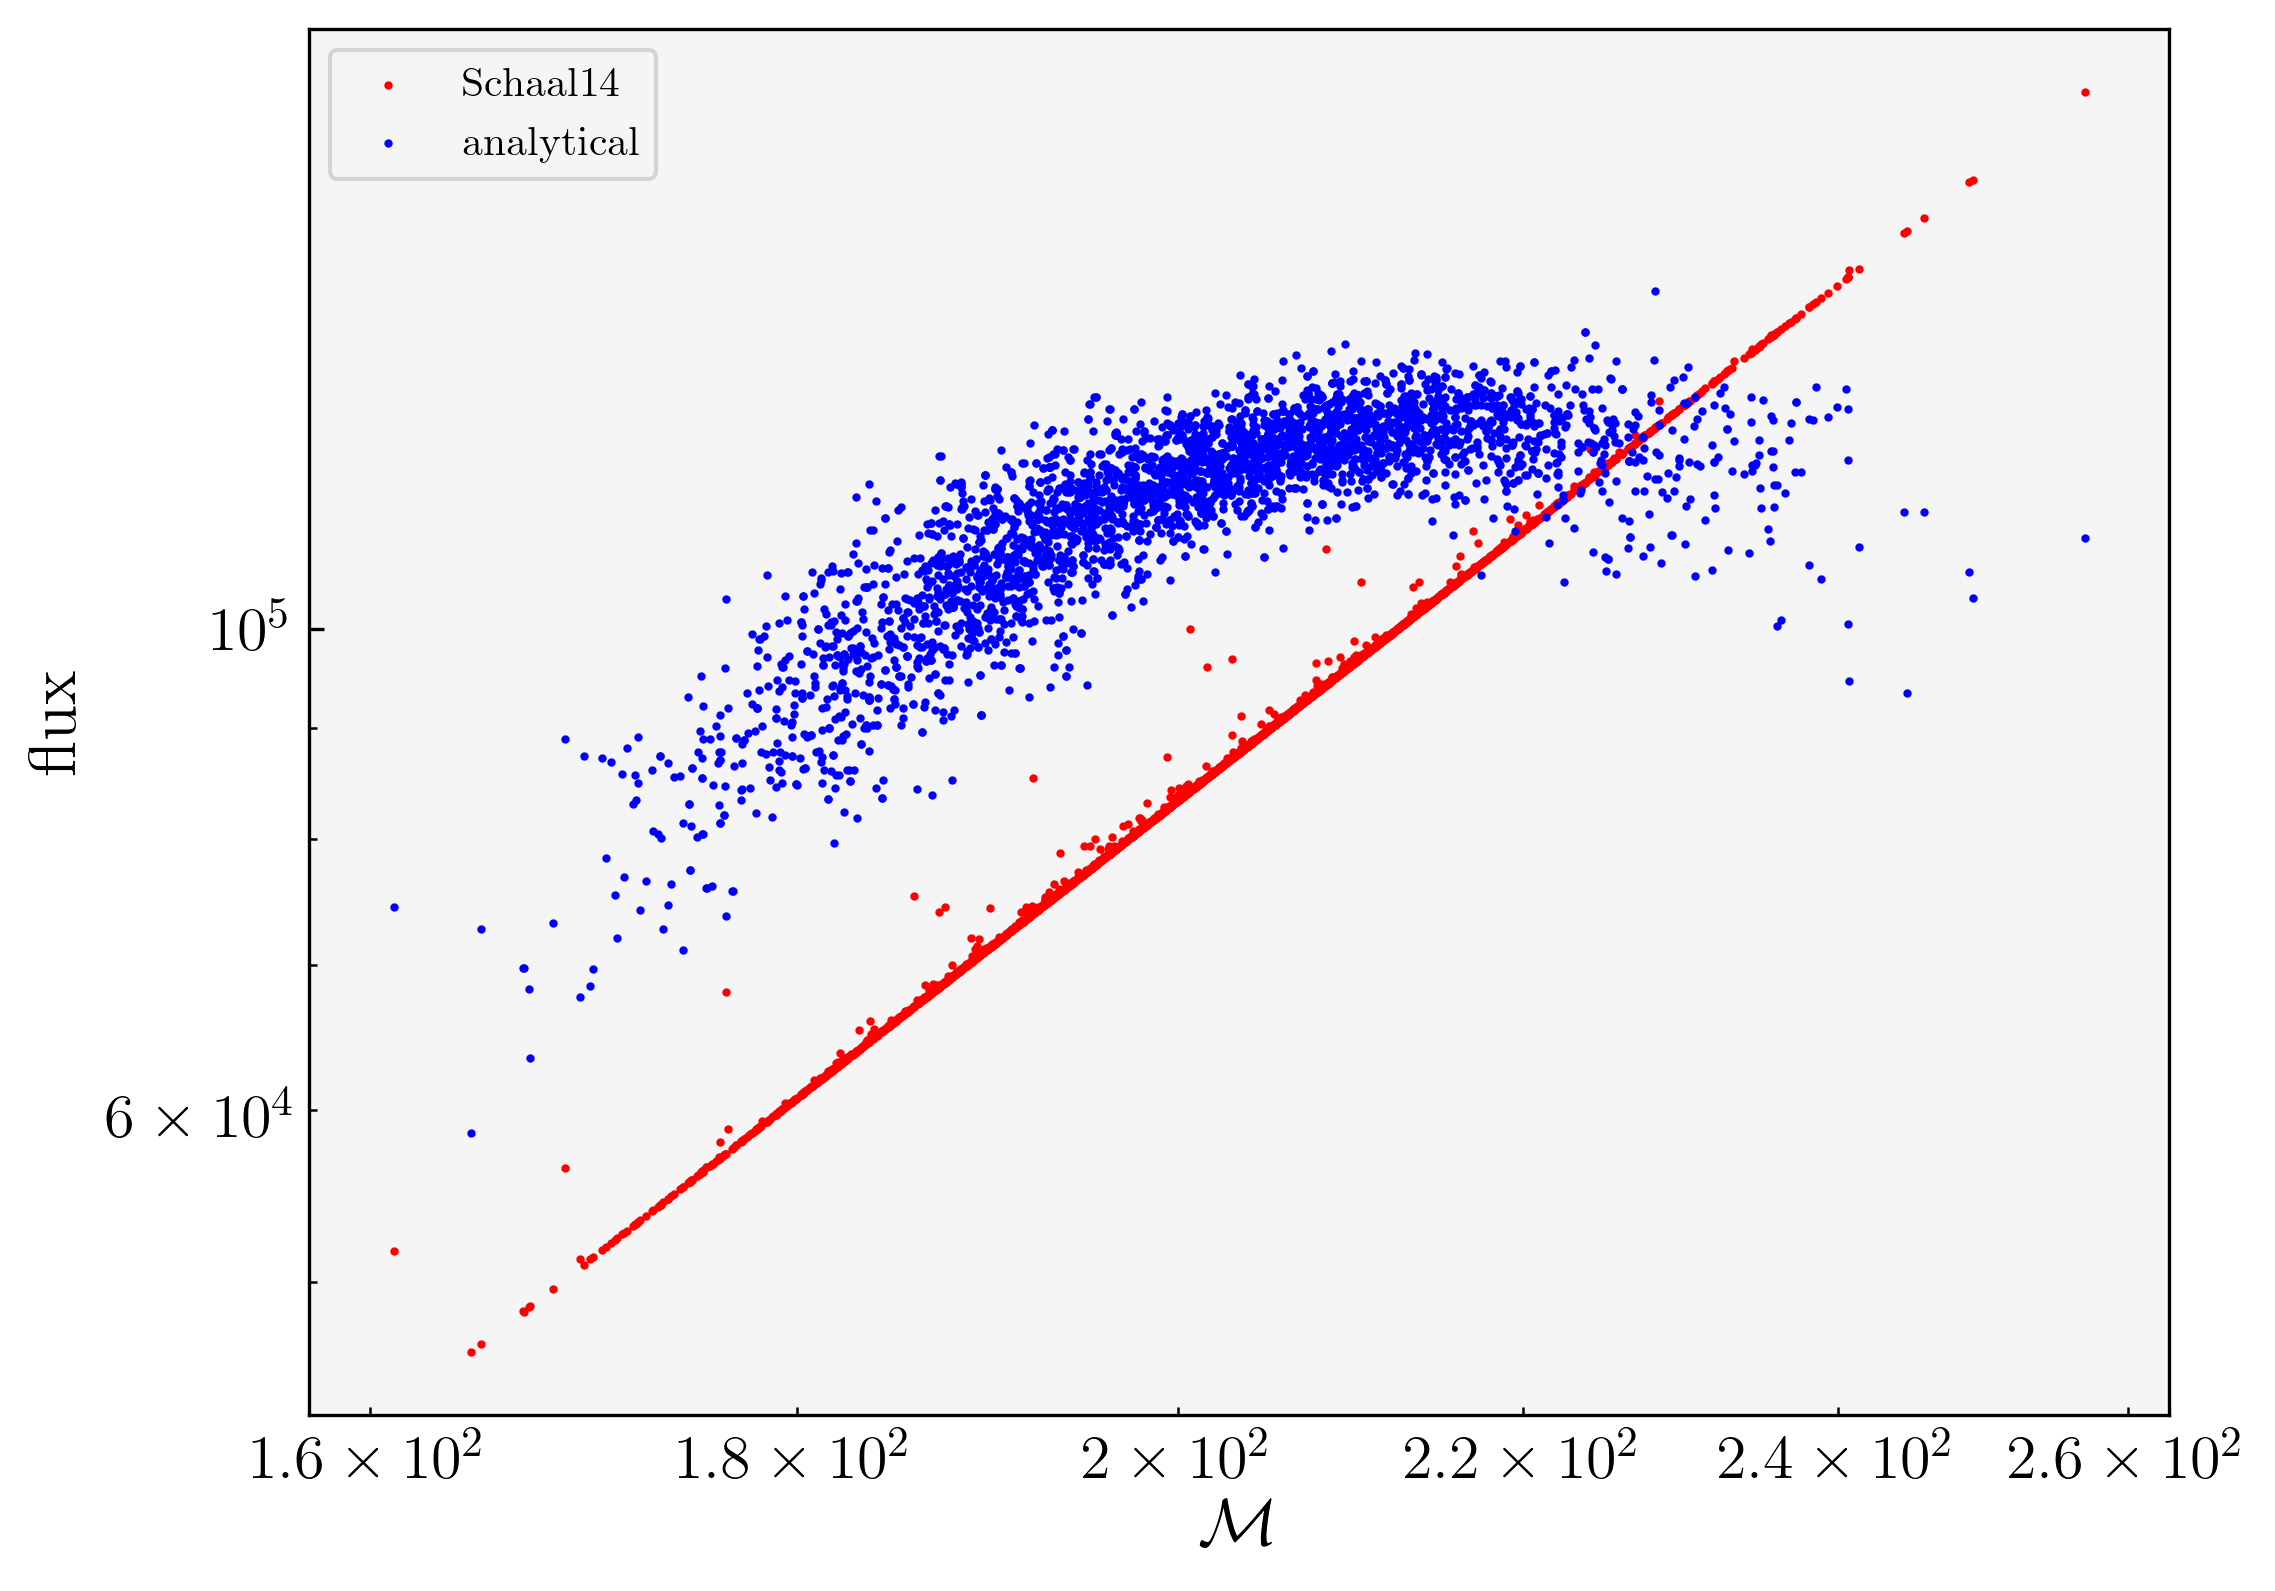

In [10]:
if folder == 'sedov':
    plt.scatter(mach_shock, flux, c = 'r', s=1, label = 'Schaal14')
    plt.scatter(mach_shock, an_flux, c = 'b', s=1, label = 'analytical')
    plt.loglog()
    #plt.xlim(1,1000)
    #plt.ylim(1e-8,1e8)
    plt.xlabel(r'$\mathcal{M}$', fontsize = 16)
    plt.ylabel('flux', fontsize = 16)
    plt.legend()

Text(0, 0.5, '1-$f^{an}/f^{num}$')

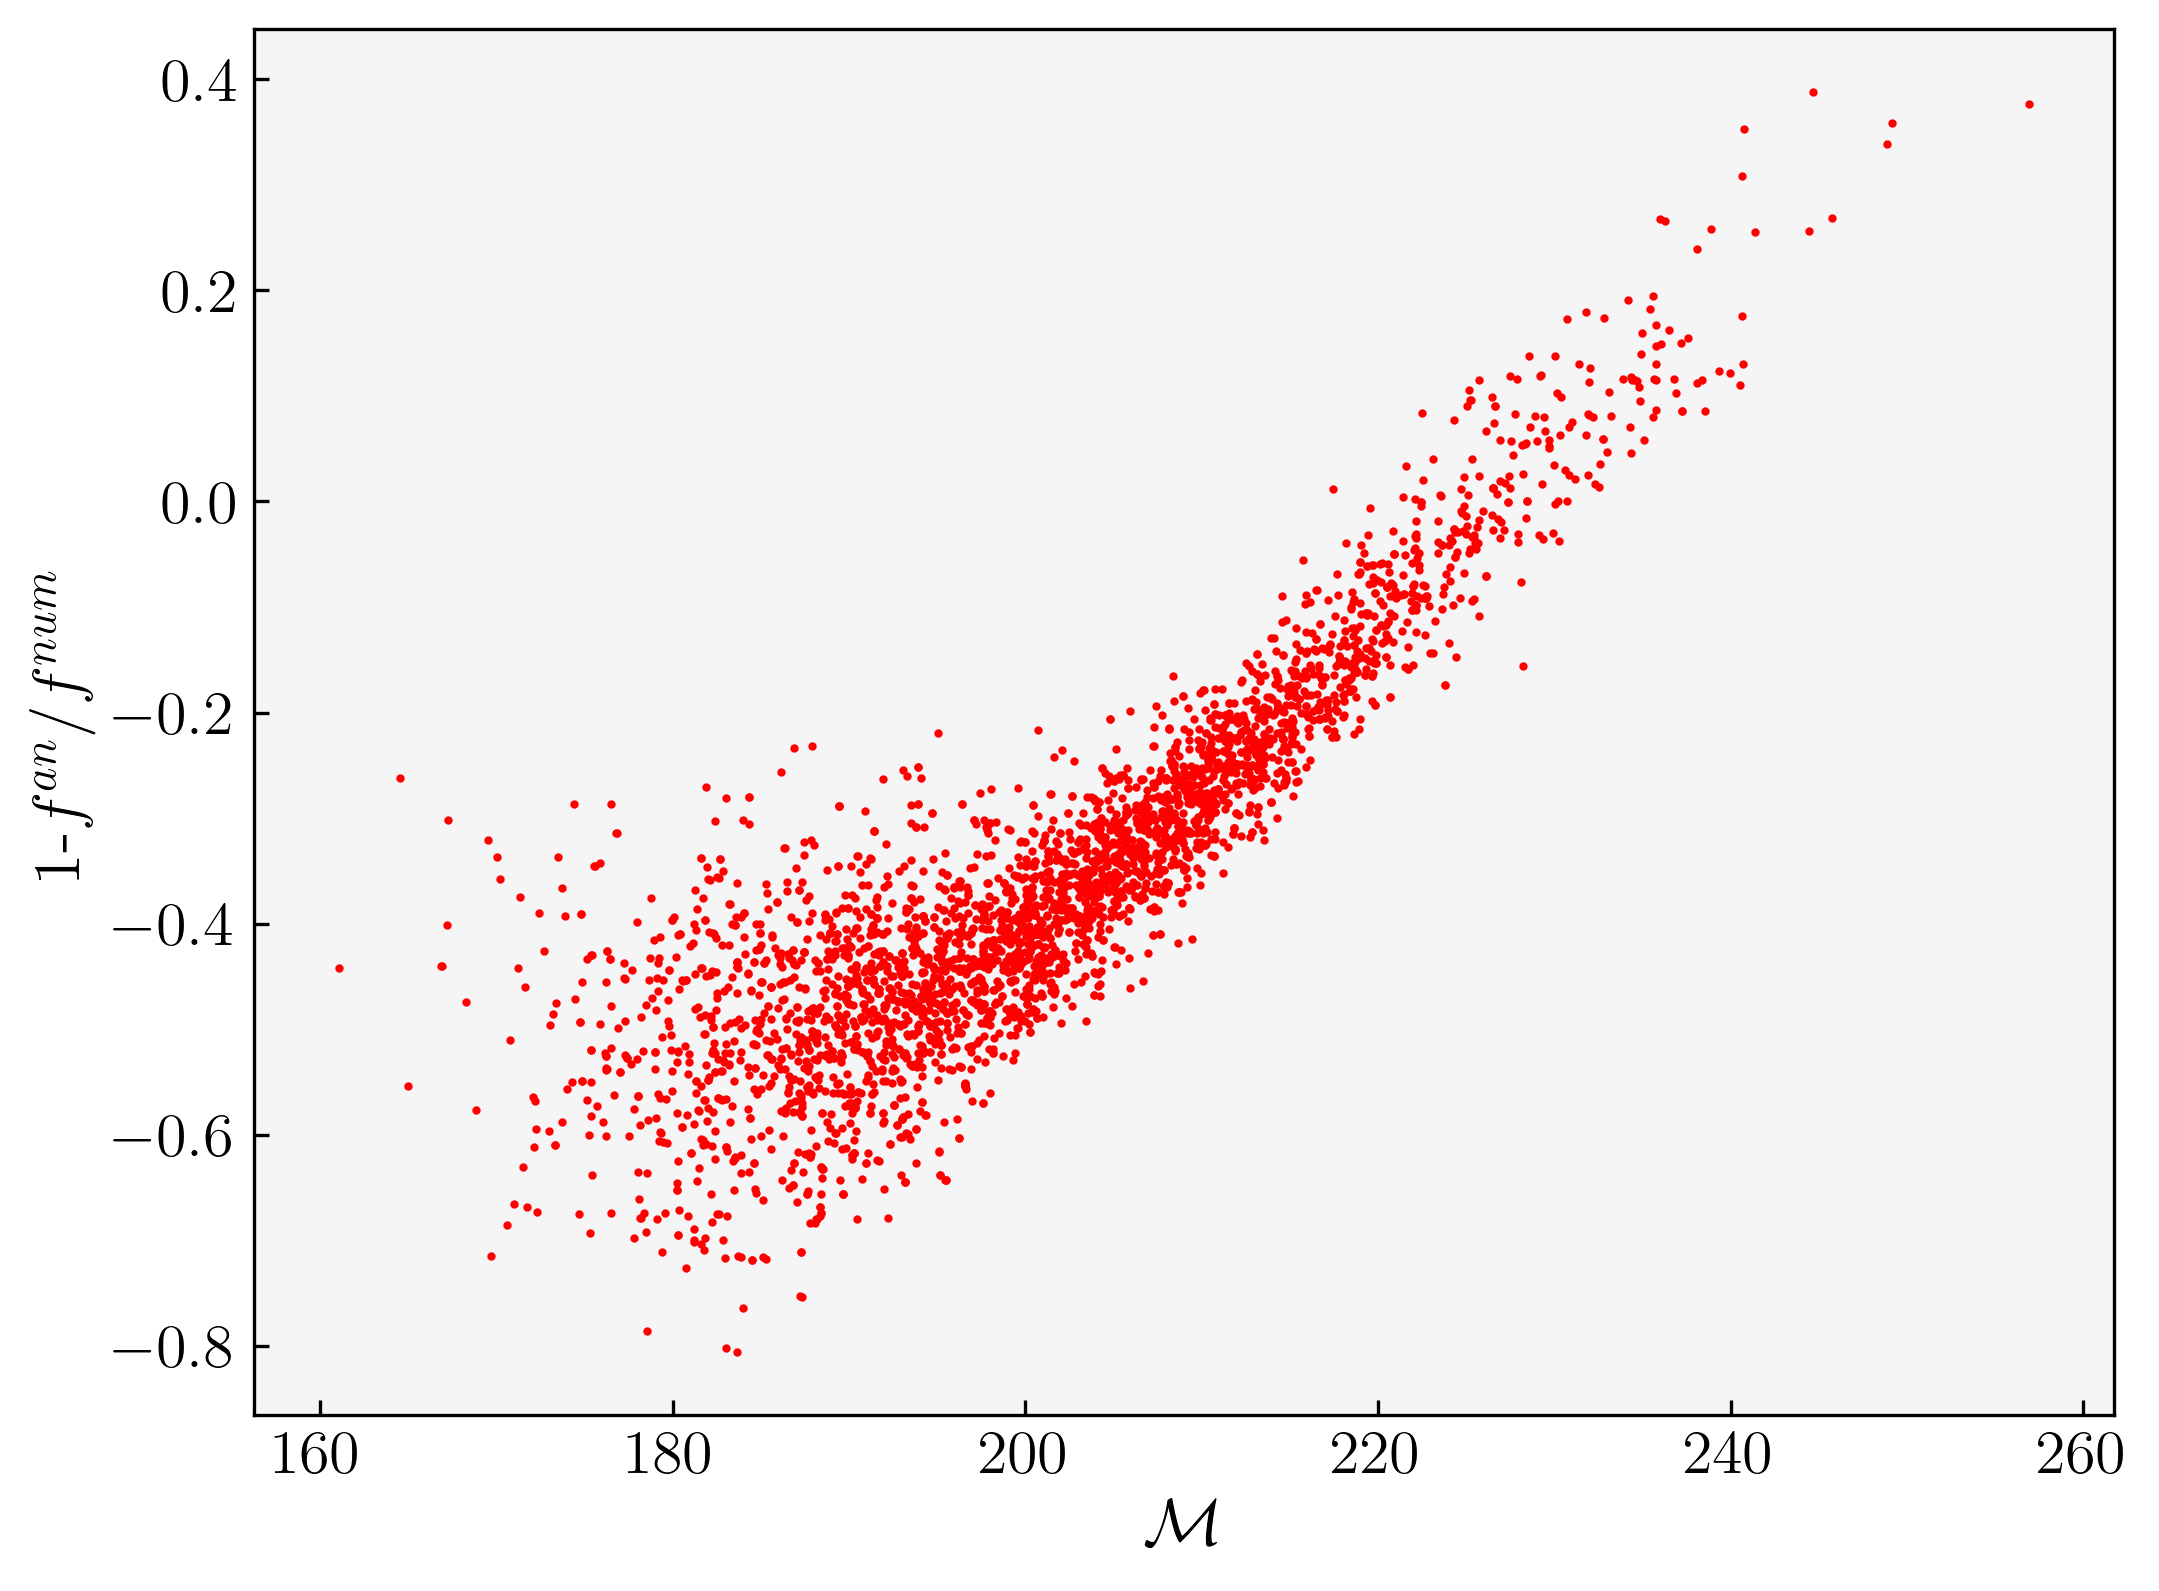

In [11]:
plt.scatter(mach_shock, 1-an_flux/flux, s=1, c = 'r')
plt.xlabel(r'$\mathcal{M}$', fontsize = 16)
plt.ylabel(r'1-$f^{an}/f^{num}$', fontsize = 16)

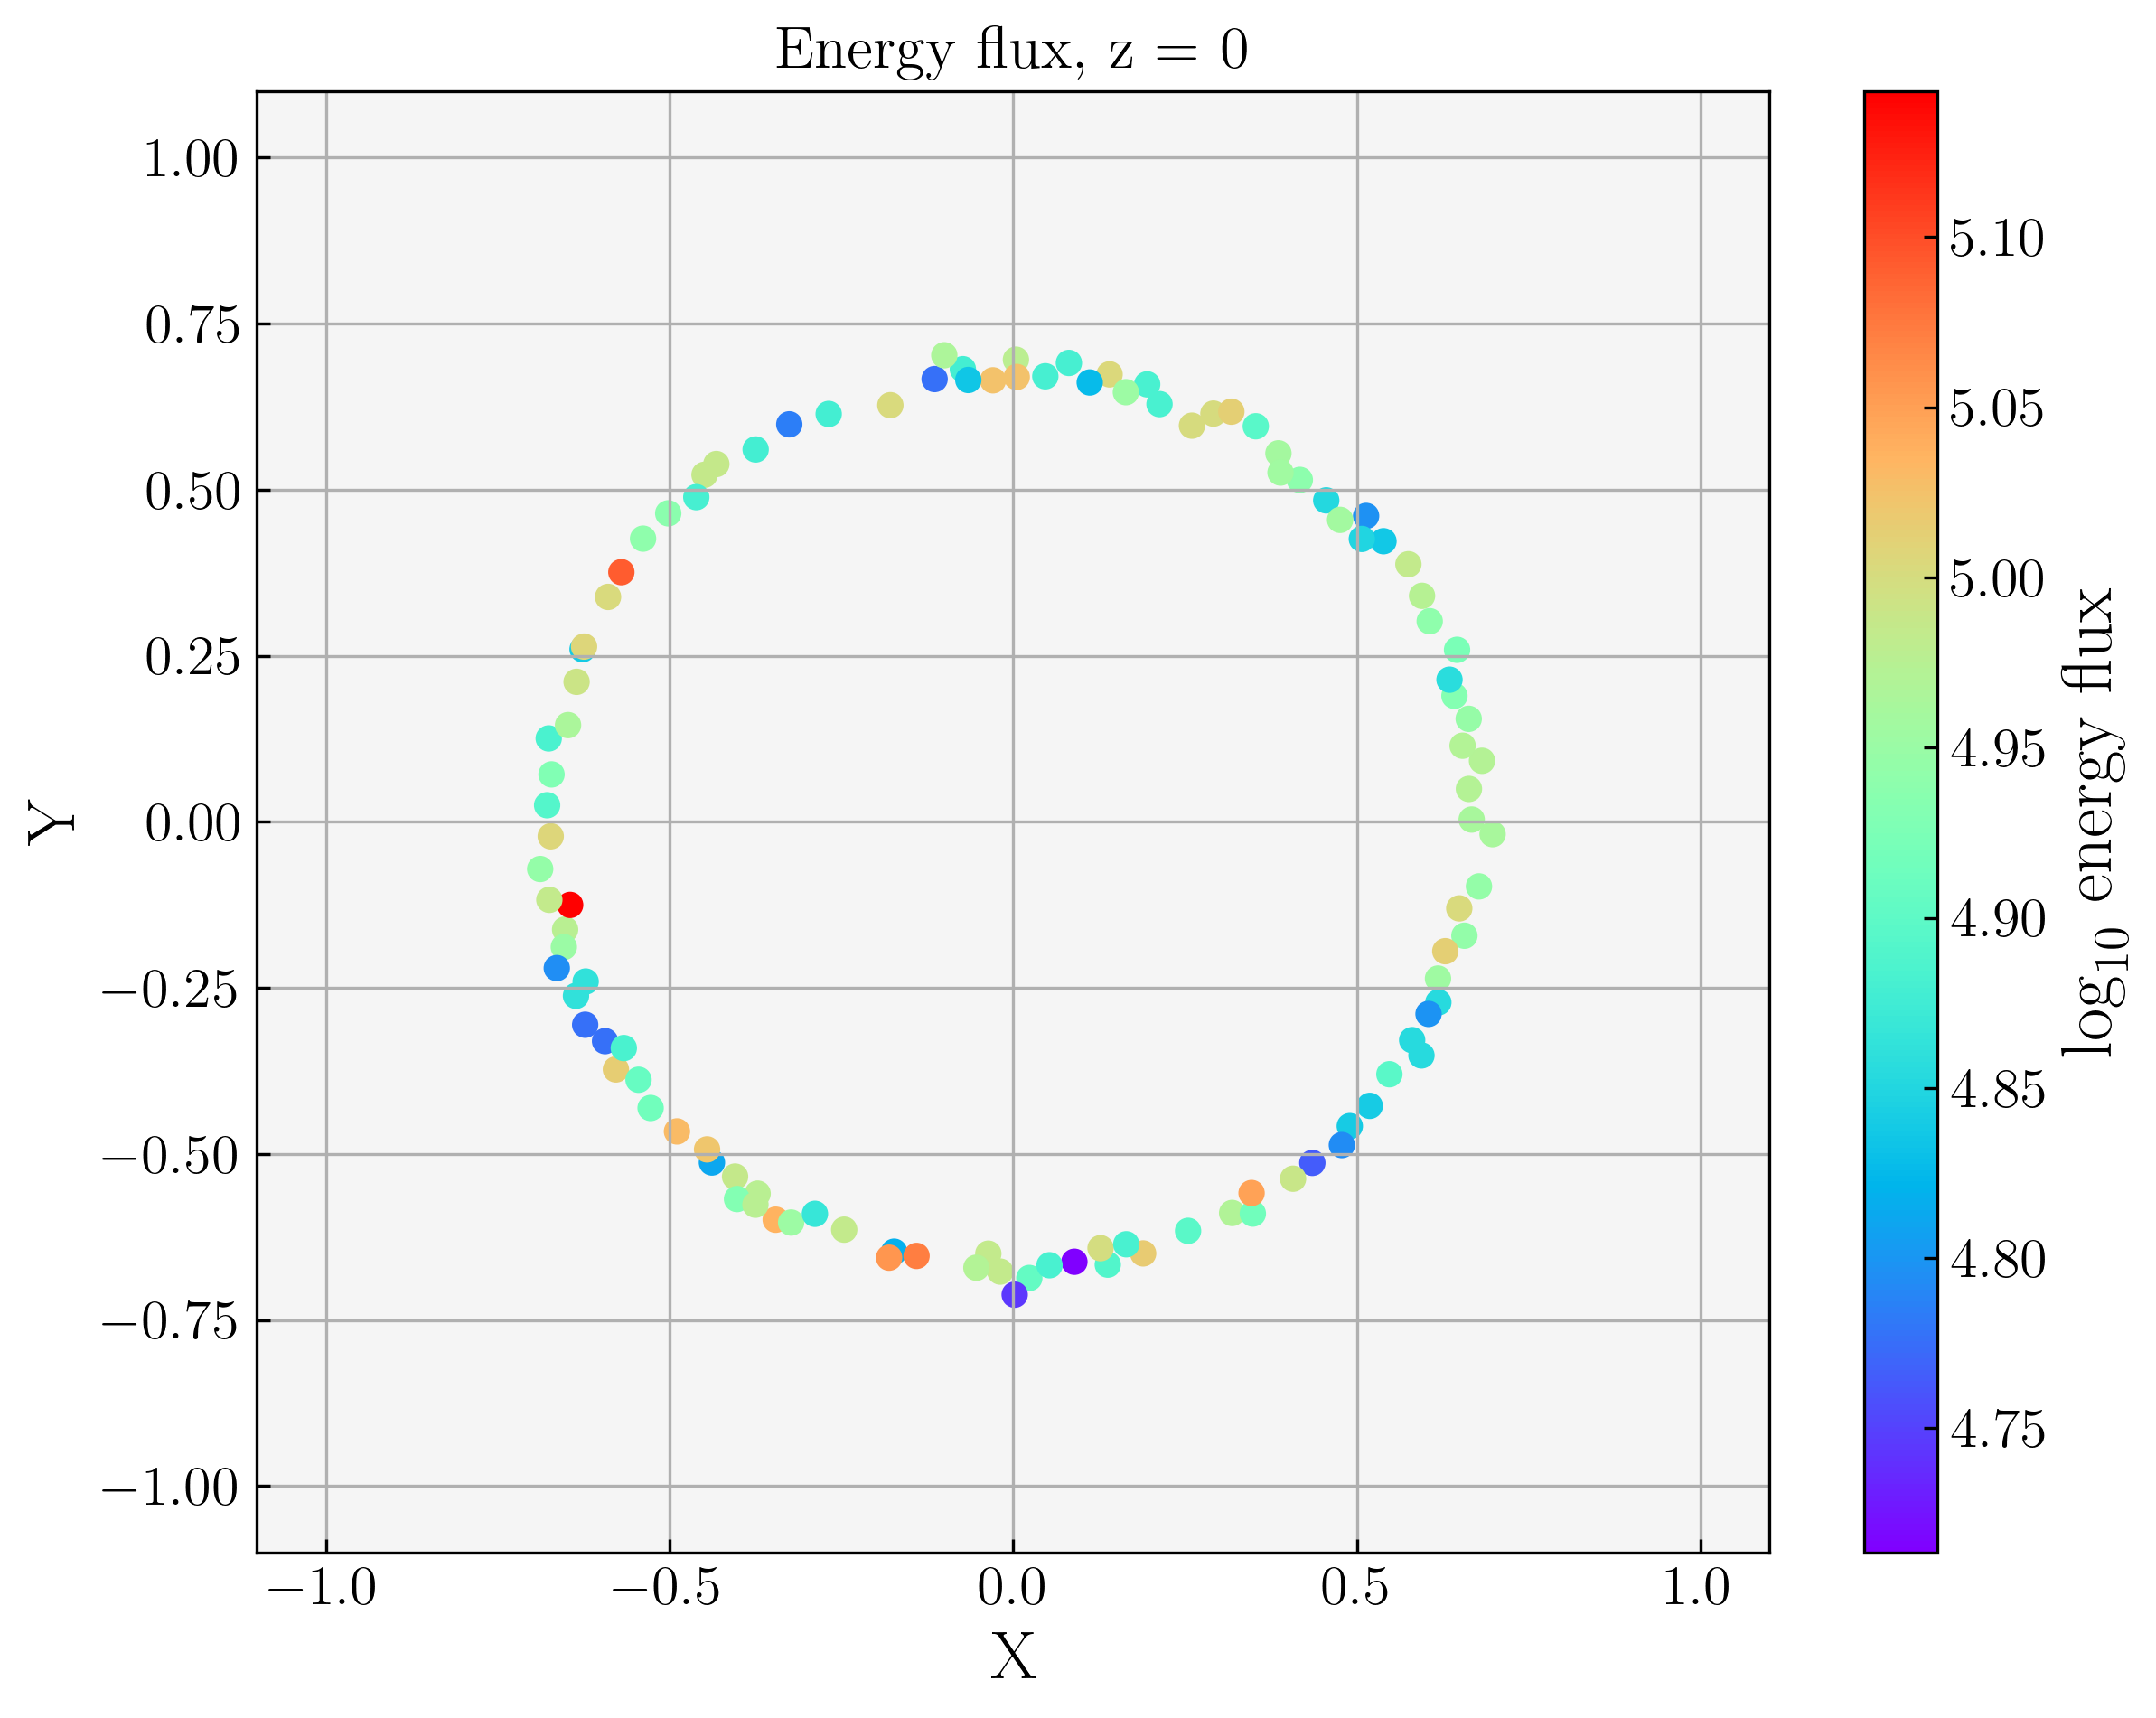

In [12]:
if folder == 'sedov':
    fig, ax = plt.subplots(1,1, figsize = (9,7))
    img = ax.scatter(surface_cross_x, surface_cross_y, c = np.log10(flux_cross), cmap = 'rainbow')
    cbar = plt.colorbar(img)
    cbar.set_label(r'$\log_{10}$ energy flux', fontsize = 19)
    ax.set_xlim(-1.1,1.1)
    ax.set_ylim(-1.1,1.1)
    ax.set_xlabel('X', fontsize = 18)
    ax.set_ylabel('Y', fontsize = 18)
    plt.grid()
    ax.set_title(f'Energy flux, z = {z_chosen}', fontsize = 16)


In [13]:
if folder == 'TDE':
    fig, ax = plt.subplots(1,1, figsize = (10,7))
    ax.set_xlabel(r'X [x/R$_\odot$]', fontsize = 14)
    ax.set_ylabel(r'Y [y/R$_\odot$]', fontsize = 14)
    img = ax.scatter(x_surf, y_surf, c = flux, s = 10, cmap = 'jet', vmin = -1e-6, vmax = 1e-6)
    cb = plt.colorbar(img)
    cb.set_label(r'Flux', fontsize = 14)
    ax.set_xlim(3,46)
    ax.set_ylim(-16,21)
    plt.grid()
    plt.title(f'Cross section, z = {z_chosen}')
